In [ ]:
!pip install ultralytics roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [ ]:
from roboflow import Roboflow

# Initialize Roboflow (replace with your API key)
rf = Roboflow(api_key="01APKyukcSpt5N9nbgl6")  # Get API key from Roboflow settings
project = rf.workspace("indianfoodnet").project("indianfoodnet")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to IndianFoodNet-1 in yolov8:: 100%|██████████| 26084/26084 [00:08<00:00, 3191.20it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

# Build from YAML and transfer weights
model = YOLO('yolov8s.pt')

# Train the model
results = model.train(
    data=f"{dataset.location}/data.yaml",  # Path to dataset config
    epochs=20,                            # Number of training epochs
    imgsz=640,                            # Image size
    batch=16,                             # Batch size (reduce if GPU OOM)
    device=0,                             # Use GPU (0) or CPU (-1)
    name="indian_food_yolov8s",           # Save results to this folder
    patience=5,
    seed=42                               # Reproducibility
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 106MB/s] 


Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/IndianFoodNet-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=indian_food_yolov8s, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=1

100%|██████████| 755k/755k [00:00<00:00, 23.4MB/s]

Overriding model.yaml nc=80 with nc=30

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 22        [15, 18, 21]  1   2127658  ultralytics.nn.modules.head.Detect           [30, [128, 256, 512]]         
Model summary: 129 layers, 11,147,210 parameters, 11,147,194 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1016.7±608.2 MB/s, size: 42.9 KB)


train: Scanning /content/IndianFoodNet-1/train/labels... 11387 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11387/11387 [00:04<00:00, 2292.61it/s]


train: New cache created: /content/IndianFoodNet-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1158.8±807.9 MB/s, size: 62.0 KB)


val: Scanning /content/IndianFoodNet-1/valid/labels... 1073 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1073/1073 [00:01<00:00, 1002.57it/s]


val: New cache created: /content/IndianFoodNet-1/valid/labels.cache
Plotting labels to runs/detect/indian_food_yolov8s/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000294, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/indian_food_yolov8s
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       3.8G      0.879      2.509      1.353         33        640: 100%|██████████| 712/712 [03:47<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.80it/s]

                   all       1073       1654      0.623      0.611      0.648      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       4.6G     0.7816      1.415      1.255         41        640: 100%|██████████| 712/712 [03:39<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.19it/s]


                   all       1073       1654      0.708      0.654      0.724      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.63G     0.7712      1.266      1.247         35        640: 100%|██████████| 712/712 [03:37<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.06it/s]


                   all       1073       1654      0.696      0.692      0.749      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.67G     0.7576      1.163      1.237         50        640: 100%|██████████| 712/712 [03:36<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.09it/s]

                   all       1073       1654      0.727      0.708      0.789      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.71G     0.7239      1.051       1.21         30        640: 100%|██████████| 712/712 [03:36<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.10it/s]


                   all       1073       1654      0.827      0.776      0.855      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.74G     0.6942      0.963      1.192         32        640: 100%|██████████| 712/712 [03:37<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.01it/s]


                   all       1073       1654      0.837      0.782      0.863      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.78G     0.6737     0.8876      1.175         41        640: 100%|██████████| 712/712 [03:45<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.09it/s]


                   all       1073       1654      0.832      0.801       0.87       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.82G     0.6661     0.8343      1.168         42        640: 100%|██████████| 712/712 [03:40<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.10it/s]


                   all       1073       1654      0.819      0.815      0.881       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.85G      0.653     0.7964      1.159         42        640: 100%|██████████| 712/712 [03:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.20it/s]

                   all       1073       1654      0.855      0.809      0.894      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.89G     0.6416     0.7514      1.151         39        640: 100%|██████████| 712/712 [03:35<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.08it/s]


                   all       1073       1654      0.838      0.805      0.886      0.748
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.93G     0.5785     0.6005      1.151         16        640: 100%|██████████| 712/712 [03:32<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.15it/s]


                   all       1073       1654      0.852      0.851      0.895      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.96G     0.5497     0.5296      1.123         16        640: 100%|██████████| 712/712 [03:31<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.22it/s]


                   all       1073       1654      0.853      0.833      0.897      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         5G     0.5399     0.4869      1.115         18        640: 100%|██████████| 712/712 [03:31<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.27it/s]


                   all       1073       1654      0.855      0.844      0.901      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.04G     0.5241     0.4434      1.098         16        640: 100%|██████████| 712/712 [03:32<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.15it/s]

                   all       1073       1654      0.896      0.831      0.912      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.07G      0.509     0.4147      1.088         14        640: 100%|██████████| 712/712 [03:31<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.10it/s]

                   all       1073       1654      0.881      0.852      0.915      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.11G     0.4967     0.3857      1.078         22        640: 100%|██████████| 712/712 [03:31<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.10it/s]


                   all       1073       1654      0.896      0.841      0.912      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.14G     0.4835     0.3588      1.066         15        640: 100%|██████████| 712/712 [03:31<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.13it/s]


                   all       1073       1654      0.875      0.867      0.918      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.18G     0.4731     0.3356      1.057         17        640: 100%|██████████| 712/712 [03:31<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.10it/s]


                   all       1073       1654      0.913      0.854      0.924      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.22G     0.4591     0.3161      1.044         11        640: 100%|██████████| 712/712 [03:31<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.10it/s]


                   all       1073       1654      0.894      0.869      0.925      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.25G     0.4498     0.2988      1.038         14        640: 100%|██████████| 712/712 [03:31<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.09it/s]


                   all       1073       1654      0.907      0.855      0.924      0.808

20 epochs completed in 1.262 hours.
Optimizer stripped from runs/detect/indian_food_yolov8s/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/indian_food_yolov8s/weights/best.pt, 22.5MB

Validating runs/detect/indian_food_yolov8s/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,137,194 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.68it/s]


                   all       1073       1654      0.906      0.856      0.924      0.808
              AlooGobi         39         40       0.86      0.875      0.895      0.799
            AlooMasala         39         39      0.868      0.897      0.911      0.872
               Bhatura         44         87      0.934      0.862      0.937      0.815
          BhindiMasala         43         45      0.981      0.889      0.959      0.901
               Biryani         42         45          1      0.842      0.975      0.892
                  Chai         39         60      0.859      0.867      0.891      0.679
                 Chole         70         72      0.958      0.943      0.988      0.879
        CoconutChutney         53         57      0.849      0.886      0.866      0.782
                   Dal         44         45      0.952      0.879      0.944      0.864
                  Dosa         38         75      0.901       0.73      0.827      0.701
               DumAlo

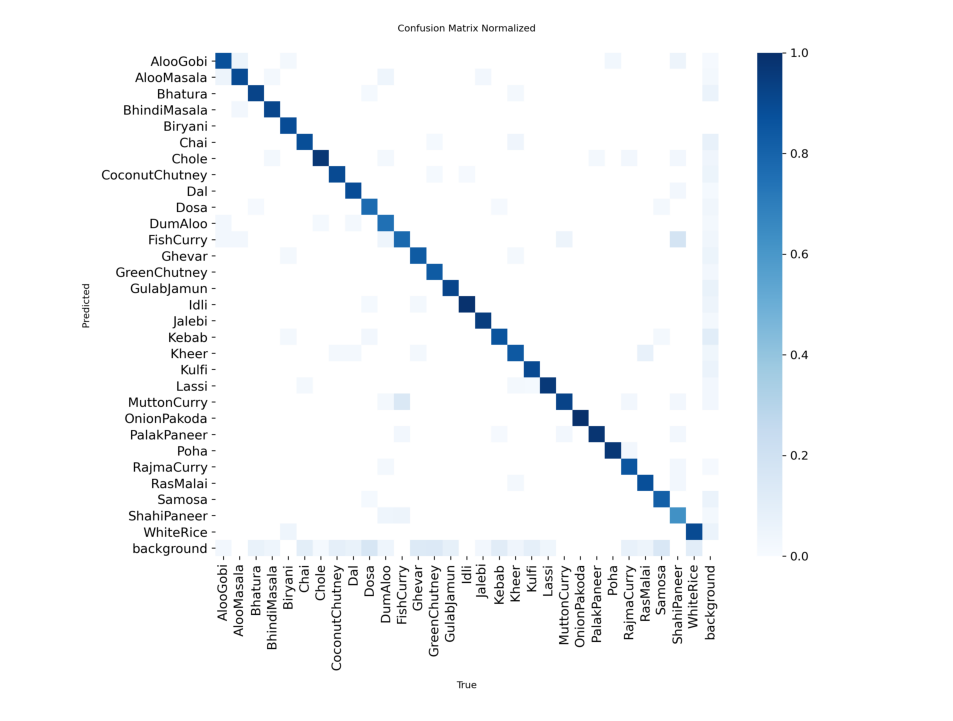

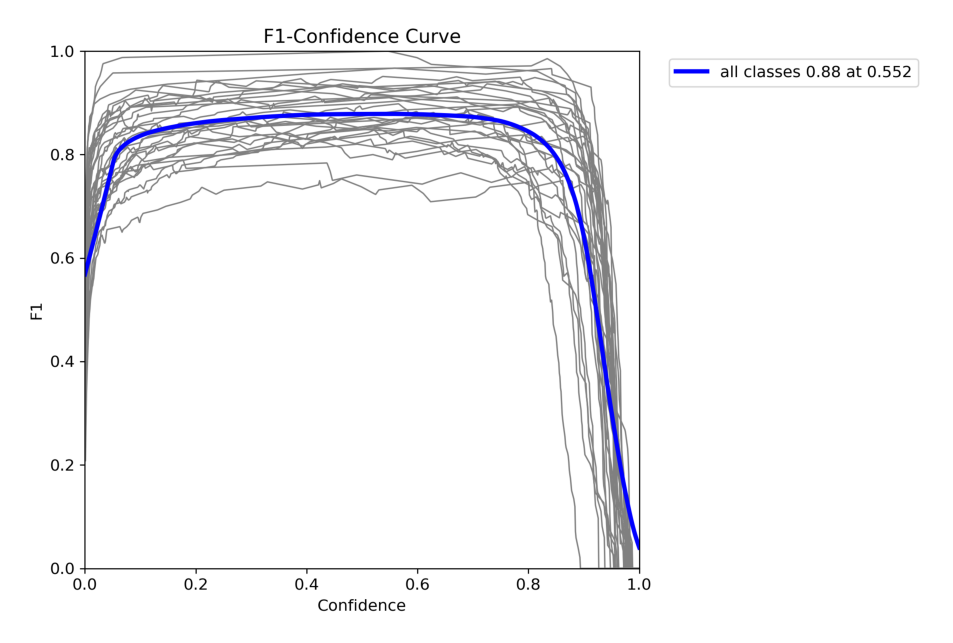

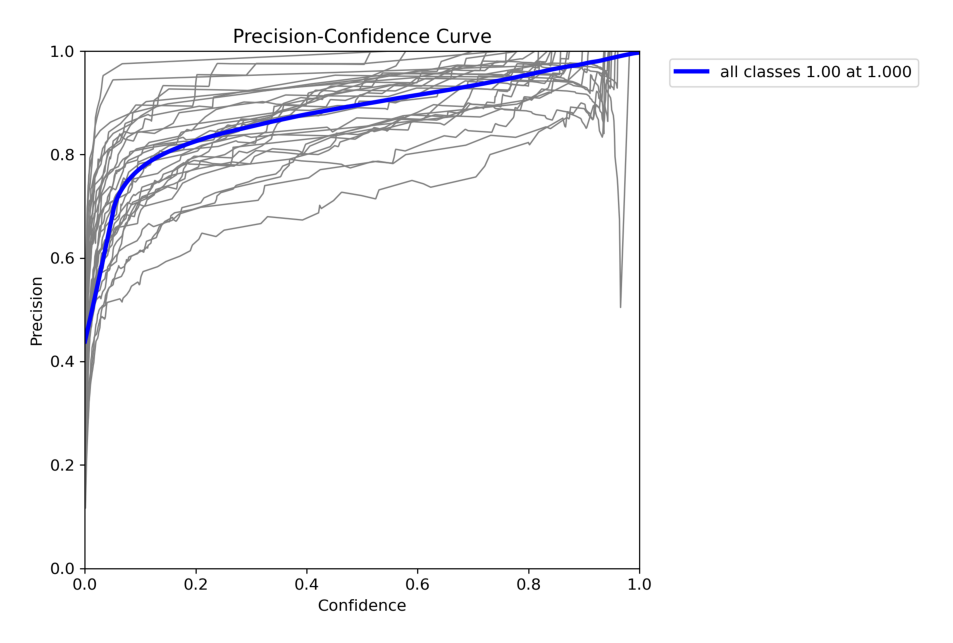

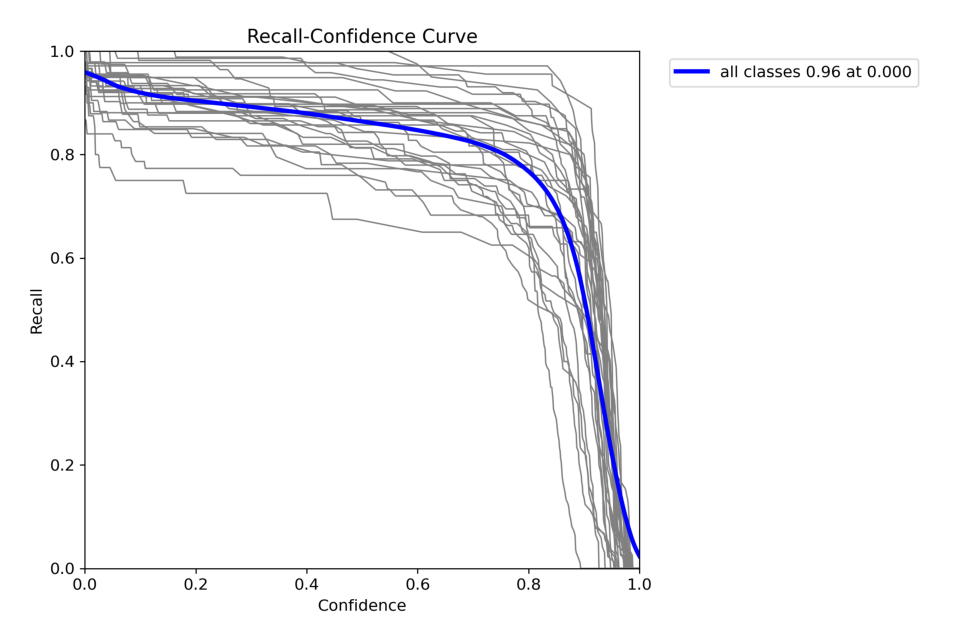

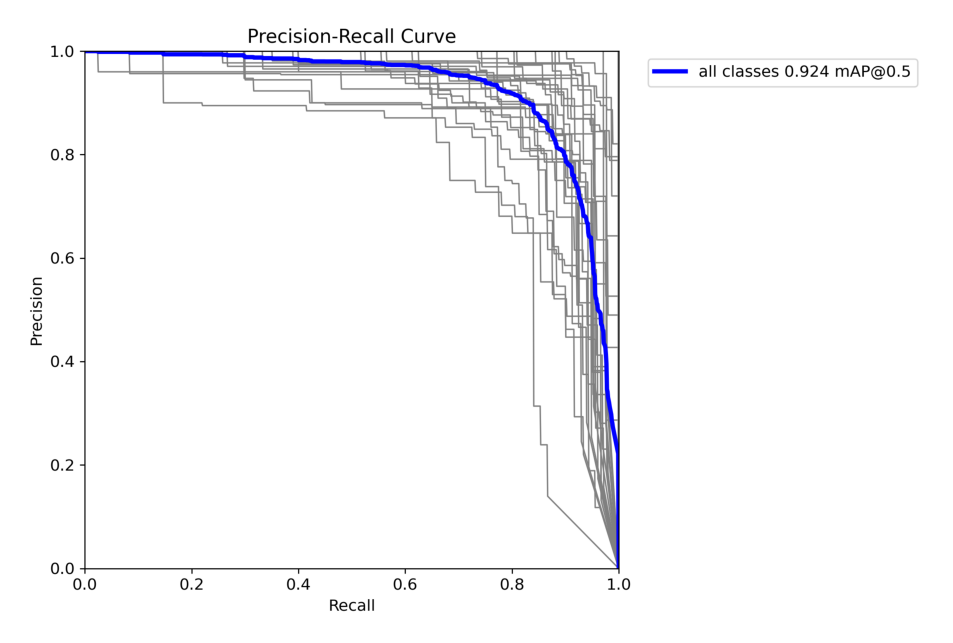

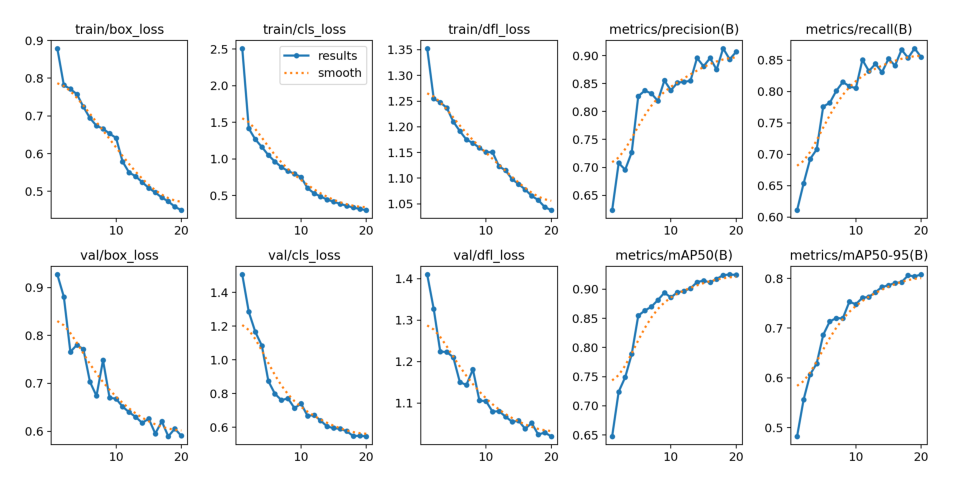

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/indian_food_yolov8s'

# Display the images
display_images(post_training_files_path, image_files)

# Loading the best model

In [ ]:
from ultralytics import YOLO
path_to_yolo_model = '/content/best.pt' # Adjust this path to your saved .pt file

print("Loading the YOLOv8 model...")
# When you load a YOLO model from a .pt file, it automatically loads the
# class names that were defined in your data.yaml during its training.
model = YOLO(path_to_yolo_model)
print("Done!")

Loading the YOLOv8 model...
Done!


#Evaluate the model on test set

In [ ]:
metrics = model.val(data=f"{dataset.location}/data.yaml",split = 'test')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,137,194 parameters, 0 gradients, 28.5 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 25.1MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 332.6±131.9 MB/s, size: 67.4 KB)



val: Scanning /content/IndianFoodNet-1/test/labels... 576 images, 0 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<00:00, 1369.34it/s]

val: New cache created: /content/IndianFoodNet-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [08:20<00:00, 13.90s/it]


                   all        576        903      0.908      0.869      0.921      0.802
              AlooGobi         21         21      0.984      0.857      0.971      0.916
            AlooMasala         20         20      0.908      0.985      0.965      0.943
               Bhatura         21         42      0.842      0.886      0.927      0.798
          BhindiMasala         25         25      0.956          1       0.99      0.913
               Biryani         24         24      0.939      0.958      0.963      0.879
                  Chai         22         33      0.957      0.909      0.941      0.734
                 Chole         40         42      0.955      0.905       0.95      0.823
        CoconutChutney         30         33      0.964      0.879      0.961      0.853
                   Dal         21         21          1      0.888      0.983      0.894
                  Dosa         20         29      0.965      0.941       0.98      0.772
               DumAlo


image 1/1 /content/IndianFoodNet-1/test/images/P1080057_jpg.rf.b65638ee177facfdc74c24b4b60374b3.jpg: 640x640 1 CoconutChutney, 560.2ms
Speed: 3.2ms preprocess, 560.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/IndianFoodNet-1/test/images/salted-lassi_jpg.rf.f2f7c31c3a8f25cdd6f91fd17cf5b4d8.jpg: 640x640 1 Lassi, 636.9ms
Speed: 3.0ms preprocess, 636.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/IndianFoodNet-1/test/images/maxresdefault-1-_jpg.rf.dc3c115c201a1f0173c3a5f099d47714.jpg: 640x640 1 Biryani, 591.0ms
Speed: 3.1ms preprocess, 591.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/IndianFoodNet-1/test/images/Rajma-Dal_jpg.rf.11e6d92899baa5f3c2d01baf167c0648.jpg: 640x640 1 RajmaCurry, 779.1ms
Speed: 2.8ms preprocess, 779.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/IndianFoodNet-1/test/images/rice_jpg.rf.e48b9377ae1

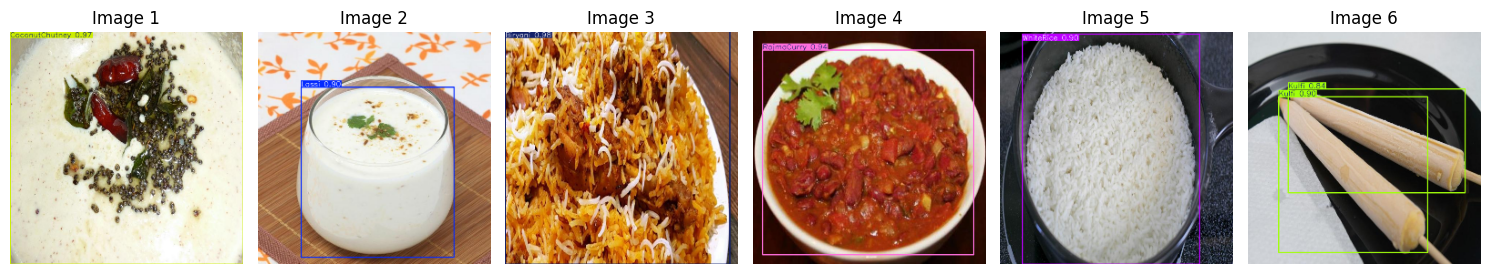

In [ ]:
import glob
import matplotlib.pyplot as plt
import cv2

# Get all test images
test_images = glob.glob(f"{dataset.location}/test/images/*.jpg")[10:16]

# Prepare a list to store processed images
predicted_images = []

# Run inference and store resized images
for image_path in test_images:
    results = model.predict(image_path, conf=0.5)
    result_image_bgr = results[0].plot()
    result_image_rgb = cv2.cvtColor(result_image_bgr, cv2.COLOR_BGR2RGB)

    # Resize the image to a fixed size (e.g., 256x256)
    resized_image = cv2.resize(result_image_rgb, (256, 256))
    predicted_images.append(resized_image)

# Plot all images in one row
plt.figure(figsize=(15, 5))
for i, img in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), i+1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# Save the trained model (optional, already saved during training)
model.save("indian_food_model.pt")

# Export to ONNX/TensorRT for deployment
model.export(format="onnx")  # Options: onnx, engine, tflite, etc.

In [ ]:
print("Class names loaded with the model:")
for class_id, class_name in model.names.items():
    print(f"  {class_id}: {class_name}")


Class names loaded with the model:
  0: AlooGobi
  1: AlooMasala
  2: Bhatura
  3: BhindiMasala
  4: Biryani
  5: Chai
  6: Chole
  7: CoconutChutney
  8: Dal
  9: Dosa
  10: DumAloo
  11: FishCurry
  12: Ghevar
  13: GreenChutney
  14: GulabJamun
  15: Idli
  16: Jalebi
  17: Kebab
  18: Kheer
  19: Kulfi
  20: Lassi
  21: MuttonCurry
  22: OnionPakoda
  23: PalakPaneer
  24: Poha
  25: RajmaCurry
  26: RasMalai
  27: Samosa
  28: ShahiPaneer
  29: WhiteRice


# Function to predict random images from internet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # OpenCV for image reading and drawing
from ultralytics import YOLO

# --- 3. Prediction Function for YOLOv8 (using built-in rendering) ---
def predict_image_yolo(filename, yolo_model, confidence_threshold=0.5):
    """
    Predicts objects in an image using a YOLOv8 model and displays the results.
    This version uses YOLOv8's built-in plot() for accurate bounding box rendering.

    Args:
        filename (str): Path to the image file.
        yolo_model (YOLO): Loaded YOLOv8 model.
        confidence_threshold (float): Minimum confidence score to display a detection.
    """
    print(f"Predicting on: {filename}")

    # Run inference
    results = yolo_model(filename)

    # Filter boxes manually (optional, plot() will show all by default)
    boxes = results[0].boxes
    filtered_boxes = [box for box in boxes if float(box.conf) >= confidence_threshold]

    if not filtered_boxes:
        print("No objects detected above threshold.")
    else:
        # Render the prediction using YOLOv8's built-in visualization
        annotated_image_bgr = results[0].plot()  # This returns an image with boxes drawn (BGR)
        annotated_image_rgb = cv2.cvtColor(annotated_image_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Display using matplotlib
        plt.figure(figsize=(6, 6))
        plt.imshow(annotated_image_rgb)
        plt.title(f"YOLOv8 Predictions (Conf > {confidence_threshold})")
        plt.axis('off')
        plt.show()



#Predict

Predicting on: /content/gulab-jamun.jpg

image 1/1 /content/gulab-jamun.jpg: 640x448 8 GulabJamuns, 614.0ms
Speed: 3.9ms preprocess, 614.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 448)


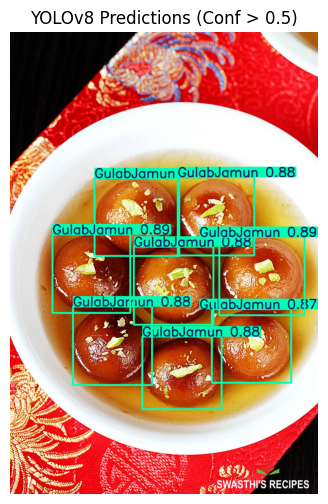

In [ ]:
test_image_path = '/content/gulab-jamun.jpg'

predict_image_yolo(test_image_path, model, confidence_threshold=0.5) # Adjust confidence as needed

Predicting on: /content/samosa-recipe.webp

image 1/1 /content/samosa-recipe.webp: 640x640 1 GreenChutney, 4 Samosas, 580.1ms
Speed: 6.5ms preprocess, 580.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


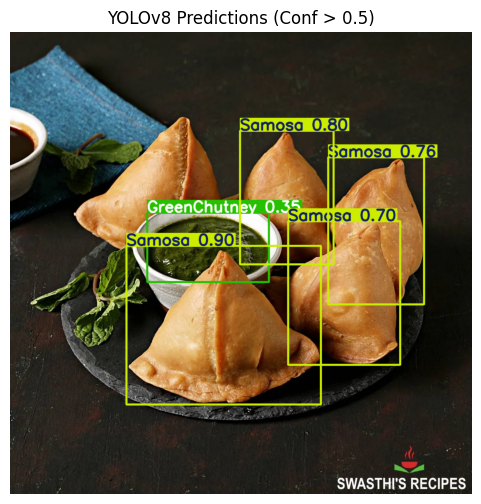

In [ ]:
test_image_path = '/content/samosa-recipe.webp'

predict_image_yolo(test_image_path, model, confidence_threshold=0.5) # Adjust confidence as needed

Predicting on: /content/Idli.webp

image 1/1 /content/Idli.webp: 640x640 4 Idlis, 921.8ms
Speed: 8.7ms preprocess, 921.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


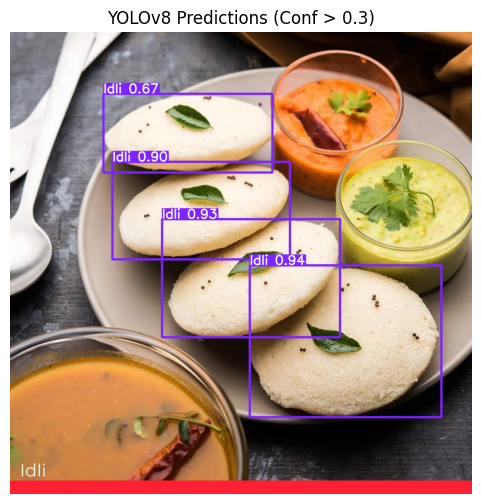

In [ ]:
test_image_path = '/content/Idli.webp'

predict_image_yolo(test_image_path, model, confidence_threshold=0.5) # Adjust confidence as needed

Predicting on: /content/Idli Dosa Batter in MIxie.jpg

image 1/1 /content/Idli Dosa Batter in MIxie.jpg: 608x640 1 CoconutChutney, 1 Dosa, 5 Idlis, 564.7ms
Speed: 5.0ms preprocess, 564.7ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


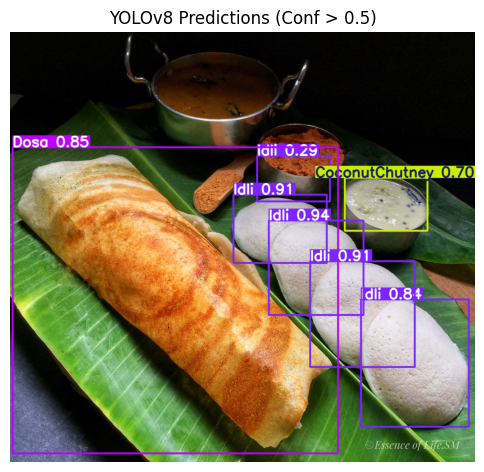

In [ ]:
test_image_path = '/content/Idli Dosa Batter in MIxie.jpg'

predict_image_yolo(test_image_path, model, confidence_threshold=0.5) # Adjust confidence as needed